# Insights on the Film & Movie Industry

## Final Project Submission

Please fill out:
* Student name: **Mitchell Wambui Chege**
* Student pace: **Full Time**
* Scheduled project review date/time: **20th November 2022**
* Instructor name: **Mark Tiba**
* Blog post URL: **N/A**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they do not know anything about creating movies. 

> **Problem Statement:** Exploring what types of films are currently doing the best at the box office and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### b) Defining the Metric for Success
The Key Performance Indicators (KPI) to determine that a film genre will be successful must satisfy the following 3 metrics:

i. Must make a profit.

ii. Have a Return on Investments(ROI) greater than 5.

iii. Have an IMDB rating equal to or greater than 7.




### c) Understanding the context 
There are numerous companies producing movies and this kind of anaysis would shed some light into the film industry. Predicting how well the movie will perform in terms of Box Office Collection success is the main objective. The success criterion for the film will be assessed using its genre, ratings, budget, and box office gross revenue.

## 2. Reading the Data

This section's goal is to thoroughly examine all of the available data sets for analysis. This is essential for choosing the pertinent datasets needed to calculate, analyze, and assess the data to which will satisfy the predetermined success metrics.

In [1]:
# Importing all relevant Module

import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
import statistics
from numpy import array


In [2]:
# Making a connection between sqlite3 database and Python Program
conn = sqlite3.connect('im.db')
    
# Getting all tables from sqlite_master
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
 
# Creating cursor object using connection object
cursor = conn.cursor()
     
# Executing our sql query
cursor.execute(sql_query)
print("List of tables\n")
     
# printing all tables list
print(cursor.fetchall())
 


List of tables

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [3]:
# Viewing the data contained in the movie_basics data frame
movie_basicsdf = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basicsdf.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# Checking the shape of movie_basicsdf for joining
movie_basicsdf.shape

(146144, 6)

In [5]:
# Viewing the data contained in the movie_ratings data frame
movie_ratingsdf = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratingsdf.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
# Checking the shape of movie_ratingsdf for joining
movie_ratingsdf.shape

(73856, 3)

In [7]:
""""The shape of the movie_basicsdf and movie_rankingsdf do not match.
 In this case, we will proceed to use merge instead of join function"""

'"The shape of the movie_basicsdf and movie_rankingsdf do not match.\n In this case, we will proceed to use merge instead of join function'

In [8]:
# Combining data frame movie_basics and movie_ratings
combined_df = pd.merge(left = movie_basicsdf, right = movie_ratingsdf, on = 'movie_id')
combined_df.tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73846,tt9908960,Pliusas,Pliusas,2018,90.0,Comedy,4.2,13
73847,tt9910502,Hayatta Olmaz,Hayatta Olmaz,2019,97.0,Comedy,7.0,9
73848,tt9910930,Jeg ser deg,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,7
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [9]:
# Viewing the data contained in the movie_gross csv file
gross_rev_csvdf = pd.read_csv("bom.movie_gross.csv")
gross_rev_csvdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
# Synchronizing titles to allow merge
gross_rev_csvdf.rename(columns = {'title':'primary_title'}, inplace = True)
gross_rev_csvdf.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
# Combining data frame combined_df and gross_rev_csvdf
combined_df2 = pd.merge(left = combined_df, right = gross_rev_csvdf, on = 'primary_title')
combined_df2.tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
3017,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3018,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Eros,1200000.0,NaN,2018
3019,tt8119752,Gonjiam: Haunted Asylum,Gon-ji-am,2018,95.0,"Horror,Mystery",6.1,2585,WGUSA,115000.0,NaN,2018
3020,tt8267604,Capernaum,Capharnaüm,2018,126.0,Drama,8.5,20215,SPC,1700000.0,NaN,2018
3021,tt8290698,The Spy Gone North,Gongjak,2018,137.0,Drama,7.2,1620,CJ,501000.0,NaN,2018
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018
3026,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000,2018


In [12]:
# Viewing the data contained in the movie_budgets csv file
movie_budget_csvdf = pd.read_csv("tn.movie_budgets.csv")
movie_budget_csvdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# Synchronizing titles to allow merge
movie_budget_csvdf.rename(columns = {'movie':'primary_title'}, inplace = True)
movie_budget_csvdf.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
# Combining data frame combined_df and movie_budget_csvdf to create a final woorking dataframe
fin_combined_df = pd.merge(left = combined_df2, right = movie_budget_csvdf, on = 'primary_title')
fin_combined_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport",5.7,9739,LG/S,42500000.0,4200000,2018,85,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1409,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005,Focus,49300000.0,44000000,2018,21,"Aug 10, 2018","$15,000,000","$49,275,340","$93,017,335"
1410,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,Affirm,17600000.0,5500000,2018,95,"Mar 23, 2018","$5,000,000","$17,547,999","$25,529,498"
1411,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Par.,67400000.0,53200000,2018,20,"Nov 16, 2018","$48,000,000","$67,363,237","$119,736,188"


In [15]:
# Viewing the data contained in the movie csv file
movies_csvdf = pd.read_csv("tmdb.movies.csv")
movies_csvdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


After careful review of the movies_csvdf, the data will not be used in this analysis. 



## 3. Checking the Data

In [16]:
# Determining the number of records in our dataset
fin_combined_df.shape

(1413, 17)

In [17]:
# Previewing the top of our dataset
fin_combined_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015,34,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
6,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,10800000,2011,16,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732"
7,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,Fox,44300000.0,10500000,2012,4,"Apr 13, 2012","$30,000,000","$44,338,224","$54,052,249"
8,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,BV,200800000.0,391000000,2010,15,"Nov 24, 2010","$260,000,000","$200,821,936","$586,477,240"
9,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,BV,73100000.0,211100000,2012,14,"Mar 9, 2012","$275,000,000","$73,058,679","$282,778,100"


In [18]:
# Previewing the bottom of our dataset
fin_combined_df.tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
1403,tt6966692,Green Book,Green Book,2018,130.0,"Biography,Comedy,Drama",8.3,204972,Uni.,85100000.0,234700000,2018,71,"Nov 16, 2018","$23,000,000","$85,080,171","$322,034,439"
1404,tt7040874,A Simple Favor,A Simple Favor,2018,117.0,"Comedy,Crime,Drama",6.9,83338,LGF,53500000.0,44100000,2018,24,"Sep 14, 2018","$20,000,000","$53,548,586","$97,628,717"
1405,tt7125860,If Beale Street Could Talk,If Beale Street Could Talk,2018,119.0,"Drama,Romance",7.2,25512,Annapurna,14900000.0,5700000,2018,96,"Dec 14, 2018","$12,000,000","$14,915,773","$19,859,167"
1406,tt7137380,Destroyer,Destroyer,2018,121.0,"Action,Crime,Drama",6.2,13683,Annapurna,1500000.0,4000000,2018,5,"Dec 25, 2018","$9,000,000","$1,533,324","$3,681,096"
1407,tt7153766,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,32049,BST,7700000.0,6600000,2018,70,"Mar 23, 2018","$1,500,000","$7,690,044","$14,244,931"
1408,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport",5.7,9739,LG/S,42500000.0,4200000,2018,85,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1409,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005,Focus,49300000.0,44000000,2018,21,"Aug 10, 2018","$15,000,000","$49,275,340","$93,017,335"
1410,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,Affirm,17600000.0,5500000,2018,95,"Mar 23, 2018","$5,000,000","$17,547,999","$25,529,498"
1411,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Par.,67400000.0,53200000,2018,20,"Nov 16, 2018","$48,000,000","$67,363,237","$119,736,188"
1412,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018,56,"Jun 8, 2018","$10,000,000","$44,069,456","$70,133,905"


In [19]:
# Checking whether each column has an appropriate datatype
fin_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1412
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1413 non-null   object 
 1   primary_title      1413 non-null   object 
 2   original_title     1413 non-null   object 
 3   start_year         1413 non-null   int64  
 4   runtime_minutes    1383 non-null   float64
 5   genres             1406 non-null   object 
 6   averagerating      1413 non-null   float64
 7   numvotes           1413 non-null   int64  
 8   studio             1413 non-null   object 
 9   domestic_gross_x   1412 non-null   float64
 10  foreign_gross      1215 non-null   object 
 11  year               1413 non-null   int64  
 12  id                 1413 non-null   int64  
 13  release_date       1413 non-null   object 
 14  production_budget  1413 non-null   object 
 15  domestic_gross_y   1413 non-null   object 
 16  worldwide_gross    1413 

## 4. External Data Source Validation

External data source validation is key in ensuring that the measurements are broadly in line with what they should be and check if there are any additional issues with your dataset. As we will accomplish herein, external validation can be done by comparing your data against a single number. 

Toptal is a network of top business, design, and technology talent that allows businesses to scale their teams as needed. The reputable company also hosts a research center where they analize data on a variety of subjects and publishes reports for public consumption. To validate my data set, I make reference to **Stars Realigned: Improving the IMDb Rating System** by *Juan Manuel* of Toptal, where he downloaded and analysed information on 242,528 movies released between 1970 and 2019, to validate my data set. Reference can be made using the following link https://www.toptal.com/data-science/improving-imdb-rating-system.

### a.Validation
> From a keen reading of the violin graph (reference link above), a good rating is one that falls between 7.5 to 10. Here we will analyze our data set and establish whether our high ratings falls within the stated range.

In [20]:
# Ordering the genres and rankings to extablish the mean of the upper limit
upper_limit = fin_combined_df.iloc[:, [5,6]]
upper_limit.sort_values(by = ['averagerating'], ascending = False)

,genres,averagerating
454,Documentary,9.2
143,Adventure,9.2
1399,Drama,8.8
371,"Action,Adventure,Sci-Fi",8.8
562,Documentary,8.8
...,...,...
69,Horror,2.6
719,Horror,2.4
789,"Comedy,Thriller",2.1
42,Drama,1.7


In [21]:
np.percentile(upper_limit.averagerating, [75])

array([7.1])

The lowest rating in the upper limit is 7.1. This is a good indicator that the mean of the upper limits will fall above 7.5 which is the working average rate for a good rating. 
However we can confirm this by plotting a Kernel Distribution Estimation (KDE) graph below. 

<AxesSubplot:ylabel='Density'>

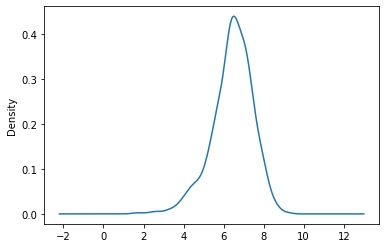

In [22]:
upper_limit['averagerating'].plot(kind = "kde")

The graph depicts a normal distribution which further validates the data set used in this analysis.

## 5. Tidying the Dataset

Data cleaning aids in transforming unreliable data into information that is useful. In this section we will check for and handle missing data, remove repeated or irrelevant data and filter any structural errors. This will result in data that is reliable for carrying out the Exploratory Analysis and providing useful insights to the Microsoft team.


In [23]:
# Checking for any Missing Data
fin_combined_df.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes       30
genres                 7
averagerating          0
numvotes               0
studio                 0
domestic_gross_x       1
foreign_gross        198
year                   0
id                     0
release_date           0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
dtype: int64

In [24]:
# Calculating the percentage of missing values
percent_missing = fin_combined_df.isnull().sum() * 100 / len(fin_combined_df)
percent_missing.sort_values(ascending = False)

foreign_gross        14.012739
runtime_minutes       2.123142
genres                0.495400
domestic_gross_x      0.070771
worldwide_gross       0.000000
averagerating         0.000000
primary_title         0.000000
original_title        0.000000
start_year            0.000000
studio                0.000000
numvotes              0.000000
domestic_gross_y      0.000000
year                  0.000000
id                    0.000000
release_date          0.000000
production_budget     0.000000
movie_id              0.000000
dtype: float64

The calculation of foreign gross revenue shows that 14% of the data is missing. Since this is a significant amount compared to the data contained in the budgets data set, we will use the latter in our analysis as it does not contain any missing values and drop foreign_gross and any unnecessary columns. 

In [25]:
# Dropping unnecessary columns
fin_combined_df.drop(columns = ['movie_id', 'original_title', 'runtime_minutes','numvotes', 'studio', 
                   'domestic_gross_x', 'foreign_gross', 'year', 'id', 
                   'release_date'], inplace = True)
fin_combined_df

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,2012,"Adventure,Drama,Romance",6.1,"$25,000,000","$720,828","$9,313,302"
1,On the Road,2014,Drama,6.0,"$25,000,000","$720,828","$9,313,302"
2,On the Road,2016,Drama,5.7,"$25,000,000","$720,828","$9,313,302"
3,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,"$91,000,000","$58,236,838","$187,861,183"
4,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,"$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...
1408,Uncle Drew,2018,"Comedy,Sport",5.7,"$18,000,000","$42,469,946","$46,527,161"
1409,BlacKkKlansman,2018,"Biography,Crime,Drama",7.5,"$15,000,000","$49,275,340","$93,017,335"
1410,"Paul, Apostle of Christ",2018,"Adventure,Biography,Drama",6.7,"$5,000,000","$17,547,999","$25,529,498"
1411,Instant Family,2018,"Comedy,Drama",7.4,"$48,000,000","$67,363,237","$119,736,188"


With the information above, the only critical data set with missing values is the genres column. There are 7 movies which have not been classified and we will represent this information as unknown.  

In [26]:
# Replacing missing genres with unknown
fin_combined_df['genres'].fillna("Unknown", inplace = True)
fin_combined_df.isna().sum()

primary_title        0
start_year           0
genres               0
averagerating        0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64

In [27]:
# Converting the objects to integers
fin_combined_df['production_budget'] = fin_combined_df['production_budget'].str.replace('[\$\,]',"").astype(int)
fin_combined_df['domestic_gross_y'] = fin_combined_df['domestic_gross_y'].str.replace('[\$\,]',"").astype(int)
fin_combined_df['worldwide_gross'] = fin_combined_df['worldwide_gross'].str.replace('[\$\,]',"").astype(int)


In [28]:
# Confirming that $ has been replaced 
fin_combined_df.tail(10)

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross
1403,Green Book,2018,"Biography,Comedy,Drama",8.3,23000000,85080171,322034439
1404,A Simple Favor,2018,"Comedy,Crime,Drama",6.9,20000000,53548586,97628717
1405,If Beale Street Could Talk,2018,"Drama,Romance",7.2,12000000,14915773,19859167
1406,Destroyer,2018,"Action,Crime,Drama",6.2,9000000,1533324,3681096
1407,Unsane,2018,"Drama,Horror,Mystery",6.4,1500000,7690044,14244931
1408,Uncle Drew,2018,"Comedy,Sport",5.7,18000000,42469946,46527161
1409,BlacKkKlansman,2018,"Biography,Crime,Drama",7.5,15000000,49275340,93017335
1410,"Paul, Apostle of Christ",2018,"Adventure,Biography,Drama",6.7,5000000,17547999,25529498
1411,Instant Family,2018,"Comedy,Drama",7.4,48000000,67363237,119736188
1412,Hereditary,2018,"Drama,Horror,Mystery",7.3,10000000,44069456,70133905


In [29]:
# Confirming that the figures have been converted to integers
fin_combined_df['worldwide_gross'].dtype

dtype('int64')

This data set is clean and ready to use to analyse our data below. 

## 6. Exploratory Data Analysis


Having cleaned our data, we will proceed to analyse the data set to test if they have met the metrics defined in 1 above. 

In [30]:
fin_combined_df

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,2012,"Adventure,Drama,Romance",6.1,25000000,720828,9313302
1,On the Road,2014,Drama,6.0,25000000,720828,9313302
2,On the Road,2016,Drama,5.7,25000000,720828,9313302
3,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183
4,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,28000000,26017685,62108587
...,...,...,...,...,...,...,...
1408,Uncle Drew,2018,"Comedy,Sport",5.7,18000000,42469946,46527161
1409,BlacKkKlansman,2018,"Biography,Crime,Drama",7.5,15000000,49275340,93017335
1410,"Paul, Apostle of Christ",2018,"Adventure,Biography,Drama",6.7,5000000,17547999,25529498
1411,Instant Family,2018,"Comedy,Drama",7.4,48000000,67363237,119736188


### 6.1 Genre Vs Gross Profit

Evaluating the top performing genres by evaluating the profit is one of the ways we can establish if the film was successful. In this subsection, we will look at the total revenue (domestic_gross + foreign_gross) generated by the film vis-à-vis the cost of production (production_budget).

In [31]:
# Computing the total revenue generated from each movie
pd.options.mode.chained_assignment = None  
cols=['domestic_gross_y','worldwide_gross']
fin_combined_df['totalrevenue'] = fin_combined_df[cols].sum(axis=1)
fin_combined_df.head(10)

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue
0,On the Road,2012,"Adventure,Drama,Romance",6.1,25000000,720828,9313302,10034130
1,On the Road,2014,Drama,6.0,25000000,720828,9313302,10034130
2,On the Road,2016,Drama,5.7,25000000,720828,9313302,10034130
3,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183,246098021
4,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,28000000,26017685,62108587,88126272
5,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864,2301125489
6,The Rum Diary,2011,"Comedy,Drama",6.2,45000000,13109815,21544732,34654547
7,The Three Stooges,2012,"Comedy,Family",5.1,30000000,44338224,54052249,98390473
8,Tangled,2010,"Adventure,Animation,Comedy",7.8,260000000,200821936,586477240,787299176
9,John Carter,2012,"Action,Adventure,Sci-Fi",6.6,275000000,73058679,282778100,355836779


In [32]:
# Computing the profit generated from each movie
fin_combined_df['grossprofit']=fin_combined_df['totalrevenue']-fin_combined_df['production_budget']
fin_combined_df

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit
0,On the Road,2012,"Adventure,Drama,Romance",6.1,25000000,720828,9313302,10034130,-14965870
1,On the Road,2014,Drama,6.0,25000000,720828,9313302,10034130,-14965870
2,On the Road,2016,Drama,5.7,25000000,720828,9313302,10034130,-14965870
3,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183,246098021,155098021
4,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,28000000,26017685,62108587,88126272,60126272
...,...,...,...,...,...,...,...,...,...
1408,Uncle Drew,2018,"Comedy,Sport",5.7,18000000,42469946,46527161,88997107,70997107
1409,BlacKkKlansman,2018,"Biography,Crime,Drama",7.5,15000000,49275340,93017335,142292675,127292675
1410,"Paul, Apostle of Christ",2018,"Adventure,Biography,Drama",6.7,5000000,17547999,25529498,43077497,38077497
1411,Instant Family,2018,"Comedy,Drama",7.4,48000000,67363237,119736188,187099425,139099425


In [33]:
# Establishing the top 20 profitable movies 
check_profits=fin_combined_df.sort_values(by=['grossprofit'], ascending= False)
highest_profit=check_profits.head(20)
highest_profit

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit
1295,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,300000000,678815482,2048134200,2726949682,2426949682
5,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864,2301125489,2086125489
800,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,200000000,700059566,1348258224,2048317790,1848317790
1146,Furious 7,2015,"Action,Crime,Thriller",7.2,190000000,353007020,1518722794,1871729814,1681729814
1237,Incredibles 2,2018,"Action,Adventure,Animation",7.7,200000000,608581744,1242520711,1851102455,1651102455
1344,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",6.2,170000000,417719760,1305772799,1723492559,1553492559
1056,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,330600000,459005868,1403013963,1862019831,1531419831
340,Frozen,2013,"Adventure,Animation,Comedy",7.5,150000000,400738009,1272469910,1673207919,1523207919
338,Frozen,2010,"Adventure,Drama,Sport",6.2,150000000,400738009,1272469910,1673207919,1523207919
339,Frozen,2010,"Fantasy,Romance",5.4,150000000,400738009,1272469910,1673207919,1523207919


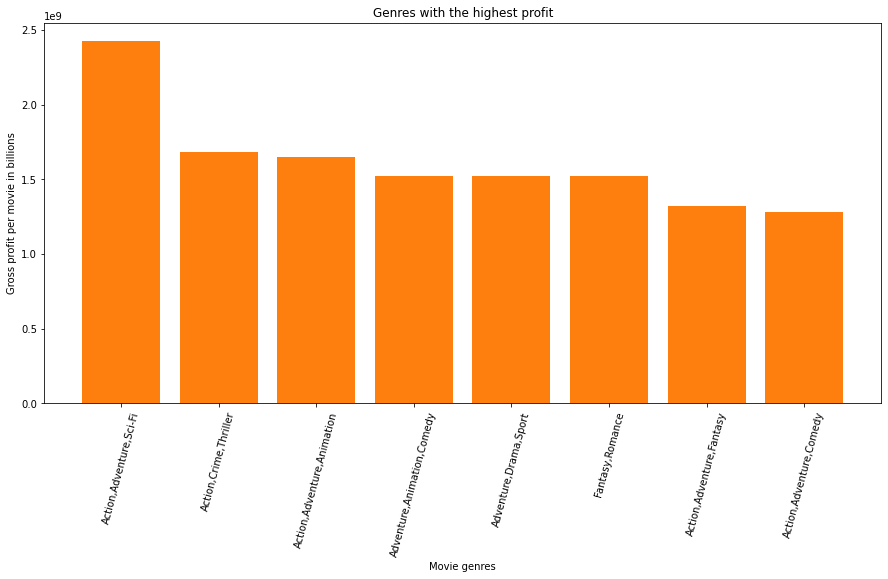

In [34]:
# Plot set up
fig = plt.figure(figsize =(15, 7))

# Creating variables for the x and y axis
highest_profit=check_profits.head(20)
x =highest_profit["genres"]
y =highest_profit["grossprofit"]

# Plotting the data
plt.bar(x[0:10], y[0:10])
plt.bar(x,y)

# Customizing the appearance of the graph
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 75)

ax.set_xlabel("Movie genres")
ax.set_ylabel("Gross profit per movie in billions")
ax.set_title("Genres with the highest profit")
ax.set_ylim(bottom=0)

plt.show()

**NB:** The values in the y axis have been illustrated to their exponets.

From above, it is evident that Action and Adventure movies are profitable films. Lets go ahead and check what the ROI is. That is, how much do we get for every dollar spent in the production of the movie.

### 6.2 Genre Vs ROI

All good investments have a Return on the investment(ROI) at least greater than 1. This means that for every dollar spent in the production of the film an amount "x" was generated as revenue.

In [35]:
# Establishing the Return on investment
fin_combined_df['ROI'] = fin_combined_df['grossprofit']/fin_combined_df['production_budget']
fin_combined_df

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit,ROI
0,On the Road,2012,"Adventure,Drama,Romance",6.1,25000000,720828,9313302,10034130,-14965870,-0.598635
1,On the Road,2014,Drama,6.0,25000000,720828,9313302,10034130,-14965870,-0.598635
2,On the Road,2016,Drama,5.7,25000000,720828,9313302,10034130,-14965870,-0.598635
3,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183,246098021,155098021,1.704374
4,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,28000000,26017685,62108587,88126272,60126272,2.147367
...,...,...,...,...,...,...,...,...,...,...
1408,Uncle Drew,2018,"Comedy,Sport",5.7,18000000,42469946,46527161,88997107,70997107,3.944284
1409,BlacKkKlansman,2018,"Biography,Crime,Drama",7.5,15000000,49275340,93017335,142292675,127292675,8.486178
1410,"Paul, Apostle of Christ",2018,"Adventure,Biography,Drama",6.7,5000000,17547999,25529498,43077497,38077497,7.615499
1411,Instant Family,2018,"Comedy,Drama",7.4,48000000,67363237,119736188,187099425,139099425,2.897905


In [36]:
# Reviewing the ROI for movies with the highest revenue
check_ROI = fin_combined_df.sort_values(by = ['grossprofit'], ascending = False)
highest_ROI = check_ROI.head(20)
highest_ROI

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit,ROI
1295,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,300000000,678815482,2048134200,2726949682,2426949682,8.089832
5,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864,2301125489,2086125489,9.702909
800,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,200000000,700059566,1348258224,2048317790,1848317790,9.241589
1146,Furious 7,2015,"Action,Crime,Thriller",7.2,190000000,353007020,1518722794,1871729814,1681729814,8.851210
1237,Incredibles 2,2018,"Action,Adventure,Animation",7.7,200000000,608581744,1242520711,1851102455,1651102455,8.255512
1344,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",6.2,170000000,417719760,1305772799,1723492559,1553492559,9.138192
1056,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,330600000,459005868,1403013963,1862019831,1531419831,4.632244
340,Frozen,2013,"Adventure,Animation,Comedy",7.5,150000000,400738009,1272469910,1673207919,1523207919,10.154719
338,Frozen,2010,"Adventure,Drama,Sport",6.2,150000000,400738009,1272469910,1673207919,1523207919,10.154719
339,Frozen,2010,"Fantasy,Romance",5.4,150000000,400738009,1272469910,1673207919,1523207919,10.154719


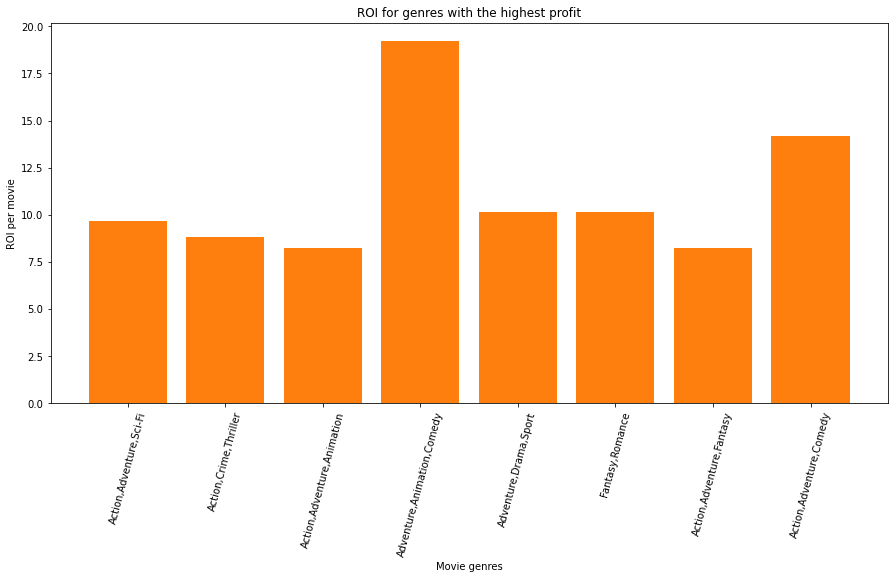

In [37]:
# Plot set up
fig = plt.figure(figsize =(15, 7))

# Creating variables for the x and y axis
highest_ROI = check_ROI.head(20)
x = highest_ROI["genres"]
y = highest_ROI["ROI"]

# Plotting the data
plt.bar(x[0:10], y[0:10])
plt.bar(x,y)

# Customizing the appearance of the graph
ax = plt.gca()
ax.tick_params(axis ='x', labelrotation = 75)

ax.set_xlabel("Movie genres")
ax.set_ylabel("ROI per movie")
ax.set_title("ROI for genres with the highest profit")
ax.set_ylim(bottom = 0)

plt.show()

From the graph, we see that the highest ROI is about 19 for an Adventure film. This implies that for every dollar spent in the production of the movie, revenue of 19 dollars was generated. This is a very good return on an investment.

### 6.3 Genre Vs Ratings

While we have analyzed the profit and ROI. It would be important to know which type of genre ranks the highest in terms of ratings. 

In [38]:
# Establishing the genres with the lowest rating 
check_rating = fin_combined_df.sort_values(by = ['averagerating'], ascending = True)
lowest_rating = check_rating.head(20)
lowest_rating

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit,ROI
702,Justin Bieber: Never Say Never,2011,"Documentary,Music",1.6,13000000,73013910,99034125,172048035,159048035,12.234464
42,The Losers,2013,Drama,1.7,25000000,23591432,29863840,53455272,28455272,1.138211
789,Jackpot,2013,"Comedy,Thriller",2.1,400000,44452,44452,88904,-311096,-0.777740
719,Anna,2017,Horror,2.4,4357373,0,1200000,1200000,-3157373,-0.724605
69,Tooth Fairy,2019,Horror,2.6,48000000,60022256,112610386,172632642,124632642,2.596513
438,Rio,2017,Drama,2.6,90000000,143619809,487519809,631139618,541139618,6.012662
969,Into the Woods,2012,Thriller,2.6,56200000,128002372,213116401,341118773,284918773,5.069729
1119,Split,2016,"Comedy,Romance,Sport",2.9,5000000,138141585,278964806,417106391,412106391,82.421278
588,Abduction,2017,"Action,Comedy,Drama",3.0,35000000,28087155,86648359,114735514,79735514,2.278158
1343,The Emoji Movie,2017,"Adventure,Animation,Comedy",3.2,50000000,86089513,216562312,302651825,252651825,5.053037


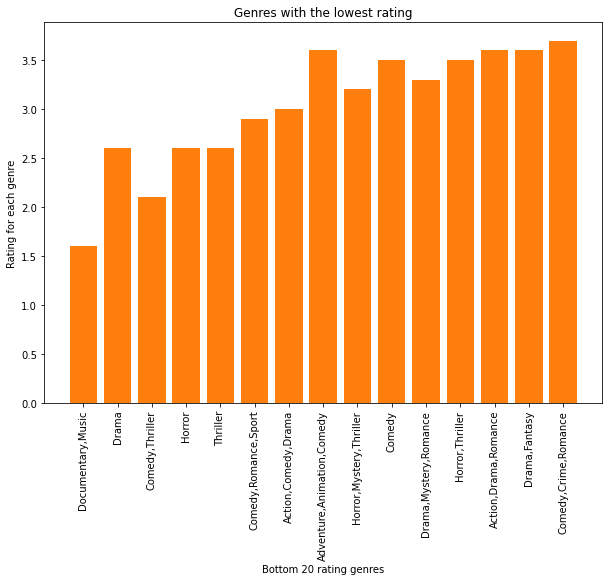

In [39]:
# Plot set up
fig3 = plt.figure(figsize =(10, 7))

# Creating variables for the x and y axis
lowest_rating = check_rating.head(20)
x = lowest_rating["genres"]
y = lowest_rating["averagerating"]

# Plotting the data
plt.bar(x[0:10], y[0:10])

# Customizing the appearance of the graph
ax = plt.gca()
ax.tick_params(axis ='x', labelrotation = 90)

ax.set_xlabel("Bottom 20 rating genres")
ax.set_ylabel("Rating for each genre")
ax.set_title("Genres with the lowest rating")

plt.bar(x,y)
plt.show()

It can be noted that the lowest rating range between 1.6 and 3.7 with 1.6 out of ten being the lowest. This is shown above in genres such as,Documentary + Music, Comedy + Mystery, Horror, Thriller to name a few. 

In [40]:
# Establishing the genres with the highest rating 
check_rating2 = fin_combined_df.sort_values(by = ['averagerating'], ascending = False)
highest_rating = check_rating.tail(20)
highest_rating

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit,ROI
971,Red,2014,Drama,8.4,60000000,90380162,196439693,286819855,226819855,3.780331
1276,Stronger,2016,"Action,Sport",8.4,30000000,4211129,8786752,12997881,-17002119,-0.566737
1045,Coco,2017,"Adventure,Animation,Comedy",8.4,175000000,209726015,798008101,1007734116,832734116,4.758481
825,Django Unchained,2012,"Drama,Western",8.4,100000000,162805434,449948323,612753757,512753757,5.127538
353,The Dark Knight Rises,2012,"Action,Thriller",8.4,275000000,448139099,1084439099,1532578198,1257578198,4.573012
1356,Dangal,2016,"Action,Biography,Drama",8.5,9500000,12391761,294654618,307046379,297546379,31.320671
304,The Tempest,2014,"Comedy,Drama",8.5,20000000,277943,277943,555886,-19444114,-0.972206
53,Samsara,2011,"Documentary,Music",8.5,4000000,2672413,5966671,8639084,4639084,1.159771
1295,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,300000000,678815482,2048134200,2726949682,2426949682,8.089832
1108,Whiplash,2014,"Drama,Music",8.5,3300000,13092006,38969037,52061043,48761043,14.776074


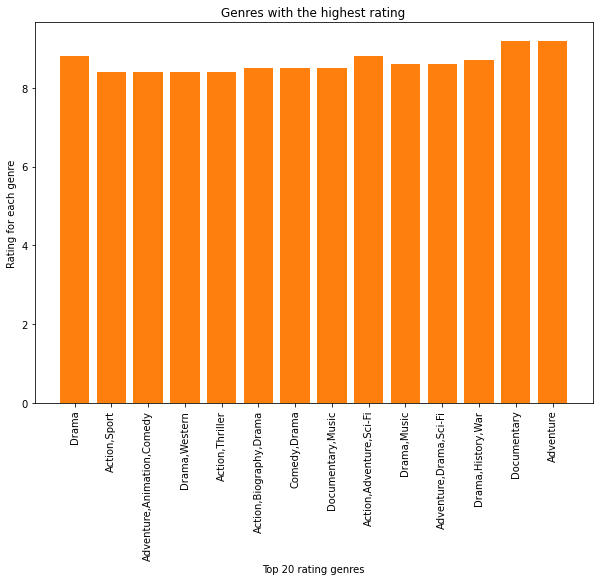

In [41]:
# Plot set up
fig4 = plt.figure(figsize =(10, 7))

# Creating variables for the x and y axis
highest_rating = check_rating.tail(20)
x = highest_rating["genres"]
y = highest_rating["averagerating"]

# Plotting the data
plt.bar(x[0:10], y[0:10])

# Customizing the appearance of the graph
ax = plt.gca()
ax.tick_params(axis ='x', labelrotation = 90)

ax.set_xlabel("Top 20 rating genres")
ax.set_ylabel("Rating for each genre")
ax.set_title("Genres with the highest rating")

plt.bar(x,y)
plt.show()

We note that Documentary and Adventure ranks highest at 9.2. However, the mode in terms of genre among the top 20 highly rated is Drama followed by Action and Adventure.

### 6.4 Genre Vs Budget

It is important to look at other determinants such as budgets to see if they do play a role in the success of the movie. We focus on this below. 

In [42]:
# Establishing the genres with the lowest production budget
check_budgets = fin_combined_df.sort_values(by = ['production_budget'], ascending = True)
lowest_budget = check_budgets.head(20)
lowest_budget

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit,ROI
555,Tiny Furniture,2010,"Comedy,Drama,Romance",6.2,50000,391674,424149,815823,765823,15.316460
1389,A Ghost Story,2017,"Drama,Fantasy,Romance",6.8,100000,1594798,2769782,4364580,4264580,42.645800
1021,The Gallows,2015,"Horror,Mystery,Thriller",4.2,100000,22764410,41656474,64420884,64320884,643.208840
739,Your Sister's Sister,2011,"Comedy,Drama",6.7,120000,1597486,3090593,4688079,4568079,38.067325
744,Sound of My Voice,2011,"Drama,Mystery,Sci-Fi",6.6,135000,408015,429448,837463,702463,5.203430
531,Another Earth,2011,"Drama,Romance,Sci-Fi",7.0,175000,1321194,2102779,3423973,3248973,18.565560
746,Like Crazy,2011,"Drama,Romance",6.7,250000,3395391,3728400,7123791,6873791,27.495164
747,Like Crazy,2016,"Comedy,Drama",7.2,250000,3395391,3728400,7123791,6873791,27.495164
1013,The Canyons,2013,"Drama,Thriller",3.8,250000,59671,62375,122046,-127954,-0.511816
887,Compliance,2012,"Biography,Crime,Drama",6.4,270000,319285,830700,1149985,879985,3.259204


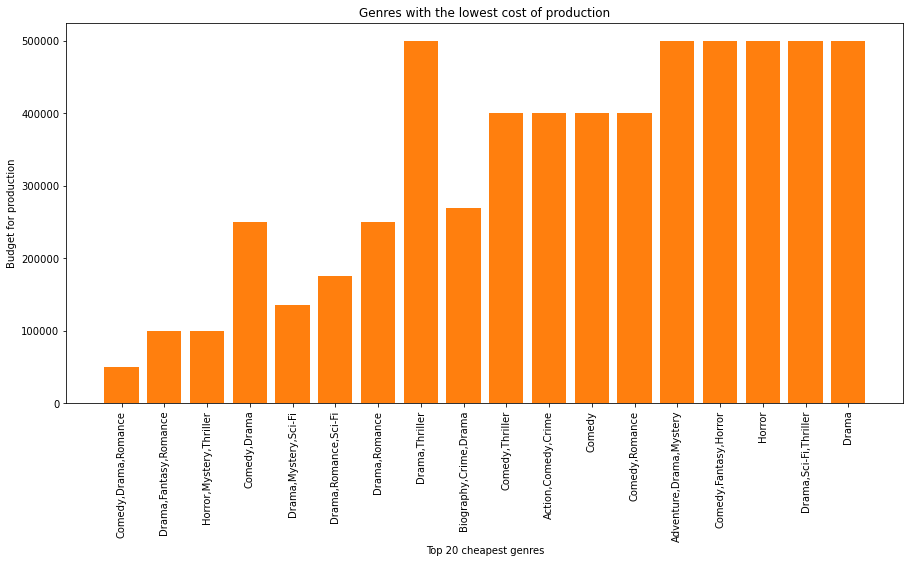

In [43]:
# Plot set up
fig = plt.figure(figsize =(15, 7))

# Creating variables for the x and y axis
lowest_budget=check_budgets.head(20)
x = lowest_budget["genres"]
y = lowest_budget["production_budget"]

# Plotting the data

plt.bar(x[0:10], y[0:10])
plt.bar(x,y)

# Customizing the appearance of the graph
ax = plt.gca()
ax.tick_params(axis ='x', labelrotation = 90)

ax.set_xlabel("Top 20 cheapest genres")
ax.set_ylabel("Budget for production")
ax.set_title("Genres with the lowest cost of production")
ax.set_ylim(bottom = 0)

plt.show()

It can be noted that the lowest budget is 100,000 dollars. This is shown above in genres such as,Comedy + Drama + Romance, Drama + Fantasy + Romance and Horror + Mystery + Thriller to name a few. It should be observed that, despite a genre's mix with other genres, Horror and Thrillers show up the most, suggesting that making a film in this genre will not cost much money. Determining whether these movies perform well would be important. 

Upon observation it is also noted that the highest rating amongst the low budget category is 7.9. This is a good rating however the rest of the genres do not receive a similarly high rating.

In [79]:
# Establishing the genres with the highest production budget
check_budgets2 = fin_combined_df.sort_values(by = ['production_budget'], ascending = False)
highest_budget = check_budgets2.head(20)
highest_budget

,primary_title,start_year,genres,averagerating,production_budget,domestic_gross_y,worldwide_gross,totalrevenue,grossprofit,ROI
315,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",6.6,410600000,241063875,1045663875,1286727750,876127750,2.133774
1056,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,330600000,459005868,1403013963,1862019831,1531419831,4.632244
1295,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,300000000,678815482,2048134200,2726949682,2426949682,8.089832
1044,Spectre,2015,"Action,Adventure,Thriller",6.8,300000000,200074175,879620923,1079695098,779695098,2.598984
125,Justice League,2017,"Action,Adventure,Fantasy",6.5,300000000,229024295,655945209,884969504,584969504,1.949898
9,John Carter,2012,"Action,Adventure,Sci-Fi",6.6,275000000,73058679,282778100,355836779,80836779,0.293952
353,The Dark Knight Rises,2012,"Action,Thriller",8.4,275000000,448139099,1084439099,1532578198,1257578198,4.573012
1264,Solo: A Star Wars Story,2018,"Action,Adventure,Fantasy",7.0,275000000,213767512,393151347,606918859,331918859,1.206978
237,The Lone Ranger,2013,"Action,Adventure,Western",6.4,275000000,89302115,260002115,349304230,74304230,0.270197
8,Tangled,2010,"Adventure,Animation,Comedy",7.8,260000000,200821936,586477240,787299176,527299176,2.028074


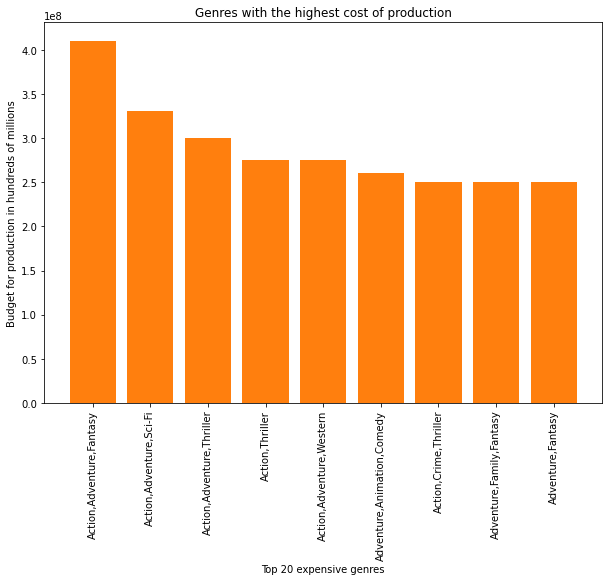

In [45]:
# Plot set up
fig2 = plt.figure(figsize =(10, 7))

# Creating variables for the x and y axis
highest_budget = check_budgets2.head(20)
x = highest_budget["genres"]
y = highest_budget["production_budget"]

# Plotting the data
plt.bar(x[0:10], y[0:10])

# Customizing the appearance of the graph
ax = plt.gca()
ax.tick_params(axis ='x', labelrotation = 90)

ax.set_xlabel("Top 20 expensive genres")
ax.set_ylabel("Budget for production in hundreds of millions")
ax.set_title("Genres with the highest cost of production")

plt.bar(x,y)
plt.show()

**NB:** The values in the y axis have been illustrated to their exponets.

It can be noted that the highest budget is 410 million dollars. This is shown above in genres such as, Action + Adventure + Fantacy. Once again we see Action and Adventure occurring more times compared to the other genres represented above.  

## 7. Data Interpretation

We have noted a pattern above where some genres seem to recur, that is, in the case of high profits, high ROI and high budget we see that Action, Adventure and Drama checking these metrics. So let us now tie it all together and establish if a relationship exists between these determinants before selecting the best genre for Microsoft's consideration.

In [47]:
# Check if there is a correlation between budget and revenue
corr = fin_combined_df['production_budget'].corr(fin_combined_df['totalrevenue'])
print(corr)

0.7635084893486749


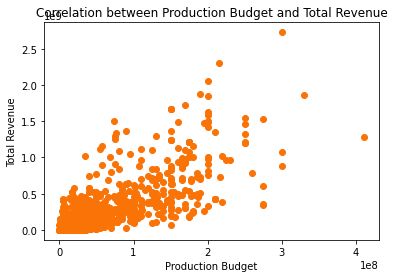

In [71]:
# Plotting a scatter plot
# to visualize the correlation between production_budget and totalrevenue
x = fin_combined_df['production_budget']
y = fin_combined_df['totalrevenue']

plt.scatter(x, y, color = '#F97306')
plt.title("Correlation between Production Budget and Total Revenue")
plt.xlabel("Production Budget")
plt.ylabel("Total Revenue")
plt.show()

In [49]:
# Check if there is a correlation between production_budget and ROI
corr = fin_combined_df['production_budget'].corr(fin_combined_df['ROI'])
print(corr)

-0.08845619210273728


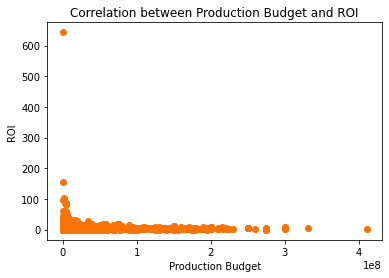

In [77]:
# Plotting a scatter plot
# to visualize the correlation between production_budget and ROI
x = fin_combined_df['production_budget']
y = fin_combined_df['ROI']

plt.scatter(x, y, color = '#F97306')
plt.title("Correlation between Production Budget and ROI")
plt.xlabel("Production Budget")
plt.ylabel("ROI")
plt.show()

In [51]:
# Check if there is a correlation between production_budget and ROI
corr = fin_combined_df['averagerating'].corr(fin_combined_df['totalrevenue'])
print(corr)

0.19501040176638268


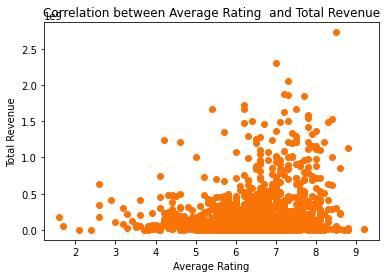

In [74]:
#Plotting a scatter plot
#to visualize the correlation between averagerating and totalrevenue
x = fin_combined_df['averagerating']
y = fin_combined_df['totalrevenue']

plt.scatter(x, y, color = '#F97306')
plt.title("Correlation between Average Rating  and Total Revenue")
plt.xlabel("Average Rating")
plt.ylabel("Total Revenue")
plt.show()

In [53]:
# Check if there is a correlation between averagerating and totalrevenue
corr = fin_combined_df['production_budget'].corr(fin_combined_df['averagerating'])
print(corr)

0.12327857128665239


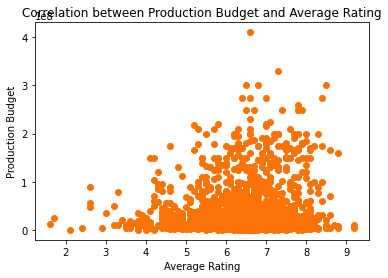

In [75]:
#Plotting a scatter plot
#to visualize the correlation between production_budget and averagerating
x = fin_combined_df['averagerating']
y = fin_combined_df['production_budget']

plt.scatter(x, y, color = '#F97306')
plt.title("Correlation between Production Budget and Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Production Budget")
plt.show()

We note there is a weak negative relationship between the production_budget and ROI of -.088. this is not a material amount and would imply that when the production_budget increases, the ROI decreases by a very minimal amount. 




Now, let us look at the correlation between **production_budget and totalrevenue** which stands at 0.763. This is a strong positive relations which indicates that means that for every positive increase in the production_budget, there is a positive increase of a fixed proportion in the revenue.

On the other hand, **averagerating and totalrevenue** ,and **production_budget and averagerating** have weak positive correlations which are important factors to keep in mind when making a film. 

With this information all sumed up and insights gained, we can now implement a solution for Microsoft below.

## 7. Conclusion and Recommendations

From the data we deduce the following:

a. A high production budget would lead to high revenue generated. Thus, Microsoft should not shy away from incurring costs as they will eventually yield high returns.

b. A high ranking would lead to higher revenues. Due to the good quality film produced, a high rating would follow leading to increased revenues and returns for the film.

c. A high production budget leads to higher ratings. This could be due to the type of writers, actors, directors and producers hired to produce the film. 

d. The budget has little to no impact on the ROI.

Action and Adventure movies check the various metrics and would be a good venture if taken up by Microsoft. Not only will the profits and ranking be high, but the ROI will be even greater.

## 8. Challenging the solution

While the three metrics give some insights into which genre will be a worthy venture, it would be important to establish if other factors such as runtime, period of production and the studio producing the film impact the success of a film. 

